In [1]:
import numpy as np
import healpy as hp
#import ConfigParser
from astropy.io import fits as pyfits
import matplotlib.pyplot as plt
import sys
import astropy as ap
from IPython.display import clear_output



In [4]:
map_CHIPASS = hp.read_map("lambda_chipass_healpix_r10.fits")

/home/karin/.local/lib/python3.8/site-packages/healpy/fitsfunc.py:351: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  warnings.warn(


NSIDE = 1024
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


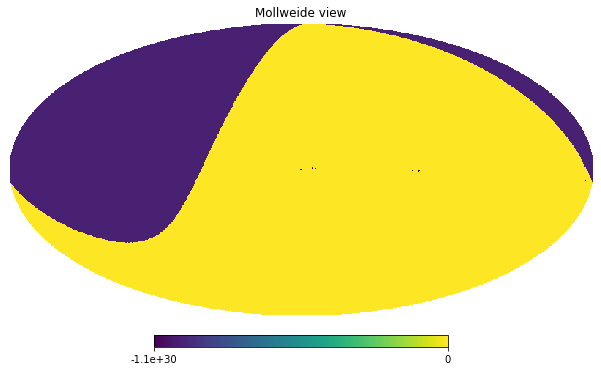

In [5]:
hp.mollview(map_CHIPASS)

In [6]:
map_CHIPASS[5000]

-1.0000000150474662e+30

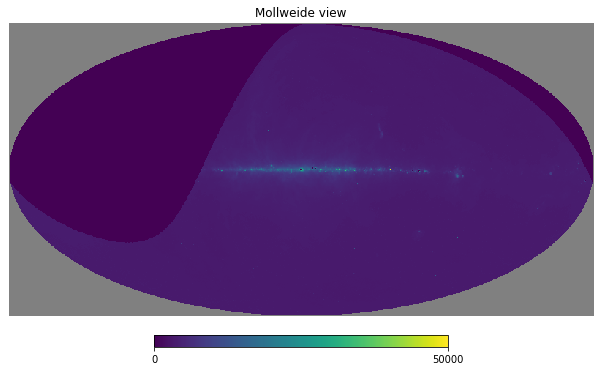

In [8]:
hp.mollview(map_CHIPASS, min=0, max= 50000);


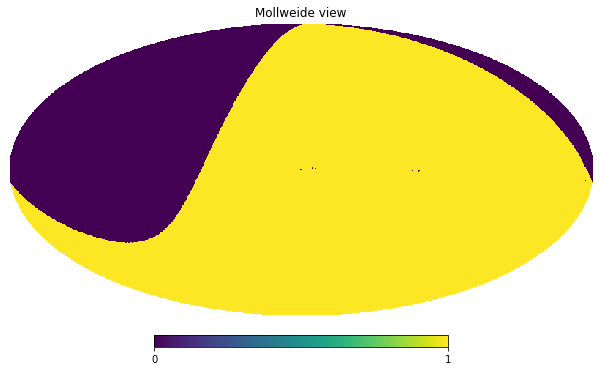

In [9]:
stars = (map_CHIPASS >0)
hp.mollview(stars)
#hp.write_map('map_chipass_mask_karin.fits', stars);

In [10]:
map_CHIPASS_mask = hp.read_map("map_chipass_mask_karin.fits")
map_CHIPASS_mask.shape

NSIDE = 1024
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


(12582912,)

In [11]:
map_test= map_CHIPASS_mask*map_CHIPASS

In [12]:
map_dipole_monopole= hp.pixelfunc.fit_dipole(map_test, nest=False, bad=0)#-1.0000000150474662e+30) #.0)# -1.6375e+30, gal_cut=0)

In [13]:
print(map_dipole_monopole)

(3840.750937159075, array([554.83072445, -17.58257279,  30.98563611]))


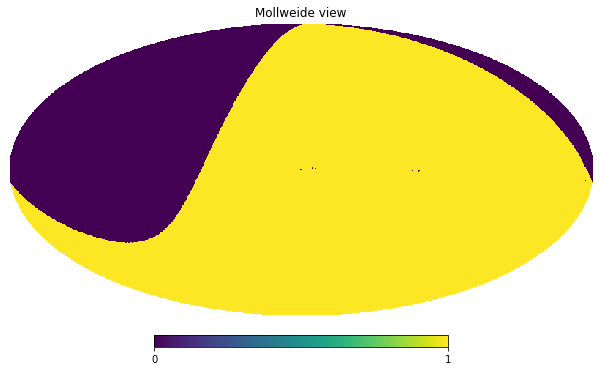

In [6]:
stars_mask = (map_CHIPASS_mask);
hp.mollview(stars_mask);

/home/karin/.local/lib/python3.8/site-packages/healpy/projaxes.py:907: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
/home/karin/.local/lib/python3.8/site-packages/healpy/projaxes.py:908: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_under(bgcolor)
/home/karin/.local/lib/python3.8/site-packages/healpy/projaxes.py:909: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registere

(30, 786432)

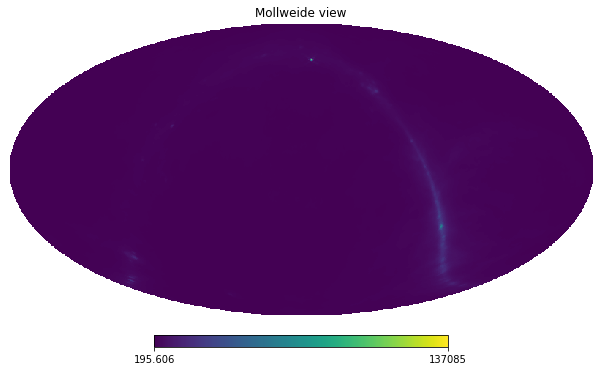

In [9]:
sync = pyfits.getdata("Commander_step1_synch.fits")
hp.mollview(sync[15,:])
sync.shape,

In [10]:
teste = (sync[15,:])*stars
hp.mollview(teste, min=0, max=10000)

ValueError: operands could not be broadcast together with shapes (786432,) (12582912,) 

(None,)

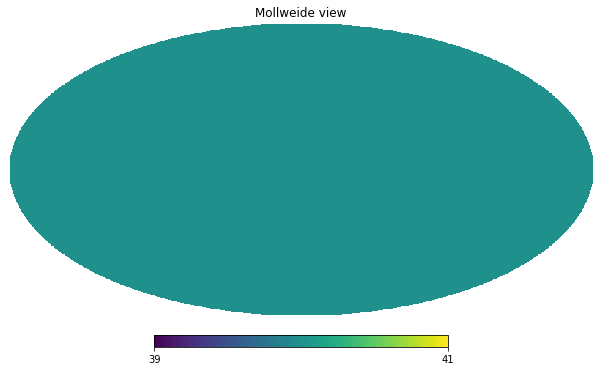

In [7]:
nside, mu, sigma = 1024, 0, 40
num_pix = hp.nside2npix(nside)
map_rms = np.zeros(num_pix)

for i in range(num_pix):
    np.random.seed(i)
    map_rms[i] = sigma

hp.write_map('map_rms_chipass_40mK_A.fits', map_rms, overwrite=True)
hp.mollview(map_rms),

In [8]:
fwhm = 2.4 * ap.units.deg
fwhm = fwhm.to(ap.units.rad)
fwhm = fwhm.value
beam = hp.gauss_beam(fwhm, lmax=3*nside, pol=False)
#bl = hp.beam2bl(beam, fwhm, 3*nside)
hp.write_cl('beam_chipassC.fits', beam, overwrite=True)

/home/karin/.local/lib/python3.8/site-packages/healpy/fitsfunc.py:89: FutureWarning: The default dtype of write_cl() will change in a future version: explicitly set the dtype if it is important to you
  warnings.warn(


NSIDE = 1024
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


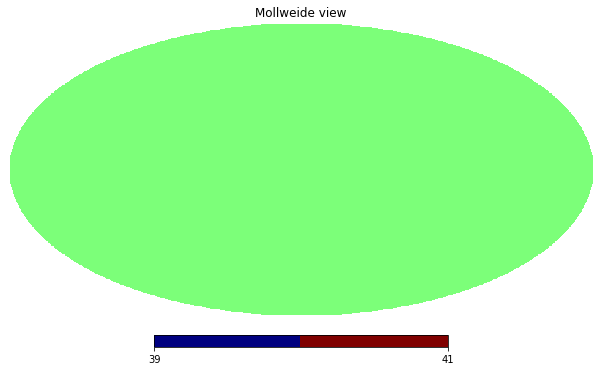

In [10]:
map_rms= hp.read_map('map_rms_chipass_40mK_A.fits')
hp.mollview(map_rms, cmap='jet', norm='hist')

/home/karin/.local/lib/python3.8/site-packages/healpy/fitsfunc.py:351: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  warnings.warn(


NSIDE = 1024
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


/home/karin/.local/lib/python3.8/site-packages/healpy/projaxes.py:907: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
/home/karin/.local/lib/python3.8/site-packages/healpy/projaxes.py:908: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_under(bgcolor)
/home/karin/.local/lib/python3.8/site-packages/healpy/projaxes.py:909: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registere

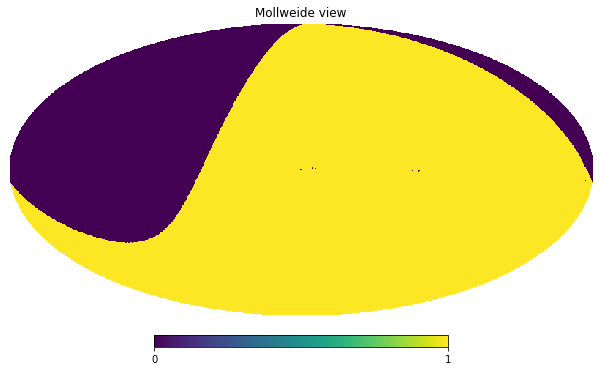

In [15]:
map_jumento = hp.read_map("chipass_mask.fits")
hp.mollview(map_jumento)

/home/karin/.local/lib/python3.8/site-packages/healpy/fitsfunc.py:351: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  warnings.warn(


NSIDE = 1024
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


/home/karin/.local/lib/python3.8/site-packages/healpy/projaxes.py:907: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
/home/karin/.local/lib/python3.8/site-packages/healpy/projaxes.py:908: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_under(bgcolor)
/home/karin/.local/lib/python3.8/site-packages/healpy/projaxes.py:909: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registere

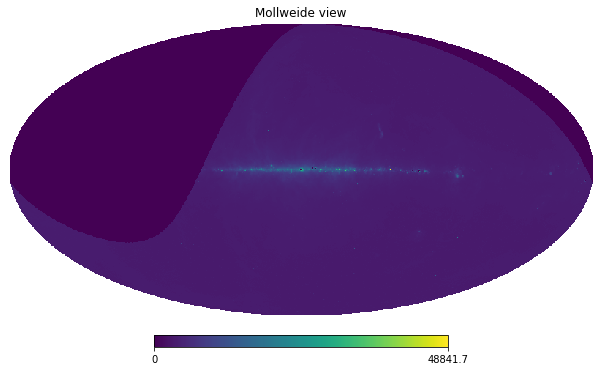

In [16]:
map_jumento2 = hp.read_map("chipass_intensity.fits")
hp.mollview(map_jumento2)

NSIDE = 1024
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


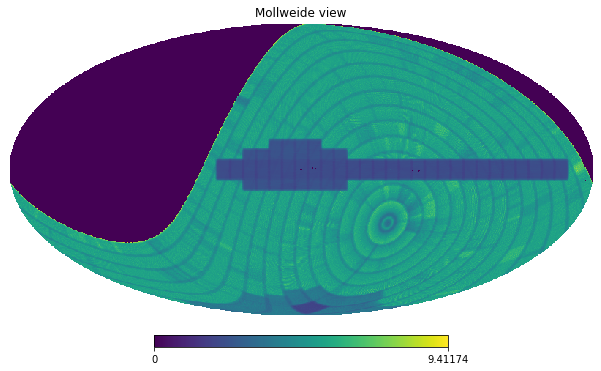

In [21]:
map_jumento3 = hp.read_map("chipass_noise.fits")
hp.mollview(map_jumento3)

In [116]:
map_rms=hp.read_map("lambda_chipass_healpix_r10.fits")
map_rms.shape

NSIDE = 1024
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


(12582912,)

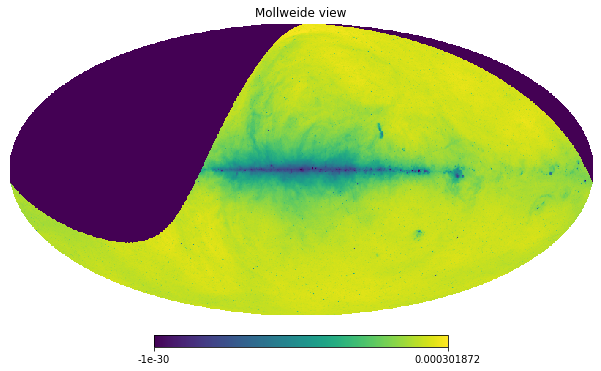

In [136]:
hp.mollview((1/map_rms))

In [140]:
from astropy.io import fits
hdul = fits.open('lambda_chipass_healpix_r10.fits')
hdul.info()

Filename: lambda_chipass_healpix_r10.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      27   ()      
  1  Archive Map Table    1 BinTableHDU     25   12582912R x 2C   [1E, 1E]   


In [141]:
data = hdul[1].data

In [143]:
hp.mollview(data[1])

TypeError: bad number of pixels